# Applied Statistics

## Modules

First we will import all the modules used throughout this notebook. 

In [ ]:
import math                         #import the math library
import itertools                    #import itertools library
import random                       #import random module
import numpy as np                  #import numpy library
import matplotlib.pyplot as plt     #import matplot library
import scipy.stats as stats         #import scipy module
import statsmodels as sm            #import statistical models library
import pandas as pd                 #import pandas library
import seaborn as sns               #import seaborn library

## Introduction

---

The following notebook contains my response to the applied statistics module for the Hdip in computer science in data analytics.

### Project instructions

Complete the project in a single notebook called project.ipynb in your repository. The same style should be used as detailed above: explanations in MarkDown and code comments, clean code, and regular commits. Use plots as appropriate.

In this project, you will analyze the PlantGrowth R dataset. You will find a short description of it on Vicent Arel-Bundock's Rdatasets page. The dataset contains two main variables, a treatment group and the weight of plants within those groups.

Your task is to perform t-tests and ANOVA on this dataset while describing the dataset and explaining your work. In doing this you should:

- Download and save the dataset to your repository.

- Describe the data set in your notebook.

- Describe what a t-test is, how it works, and what the assumptions are.

- Perform a t-test to determine whether there is a significant difference between the two treatment groups trt1 and trt2.

- Perform ANOVA to determine whether there is a significant difference between the three treatment groups ctrl, trt1, and trt2.

- Explain why it is more appropriate to apply ANOVA rather than several t-tests when analyzing more than two groups.



The data set has been downloaded and saved in the repository for access through this Jupyter notebook. 

The following description of the data set is provided by the site hosting the data base.

![Description of Data](./images/plant_growth_description.jpg)



Reviewing data description before biginning any analysis or even looking at the data itself is a worthwhile exercise. The above description provides a lot of information pertaining to the kinds of analysis that I can do on the data. following a simple review of the data description, the following information can be determined:

- The context of the study is an evaluation of the impact 2 different treatment conditions on the yield of a plant
- The data is likely continious data containing float data points
- There are 3 groups of data (control, treatment 1 and treatment 2) and a total of 30 cases (query 10 data points for each - consideration if uneqal number of data points)
- 



Next, we will import our data from the csv file to a pandas data fram for further analysis in the notebook

In [17]:
data=pd.read_csv('./dataset/PlantGrowth.csv') #import data from the csv to a pandas data frame
df= pd.DataFrame({'Group':data['group'], 'Weight':data['weight']}) #restrucutre the data import to just include the 2 columns we are interested in
print(df) #print the data fram to the console - just to confirm proper import
df.describe() #print a description of the data

   Group  Weight
0   ctrl    4.17
1   ctrl    5.58
2   ctrl    5.18
3   ctrl    6.11
4   ctrl    4.50
5   ctrl    4.61
6   ctrl    5.17
7   ctrl    4.53
8   ctrl    5.33
9   ctrl    5.14
10  trt1    4.81
11  trt1    4.17
12  trt1    4.41
13  trt1    3.59
14  trt1    5.87
15  trt1    3.83
16  trt1    6.03
17  trt1    4.89
18  trt1    4.32
19  trt1    4.69
20  trt2    6.31
21  trt2    5.12
22  trt2    5.54
23  trt2    5.50
24  trt2    5.37
25  trt2    5.29
26  trt2    4.92
27  trt2    6.15
28  trt2    5.80
29  trt2    5.26


,Weight
count,30.000000
mean,5.073000
std,0.701192
min,3.590000
25%,4.550000
50%,5.155000
75%,5.530000
max,6.310000


The above analysis is a standard pandas function that prints out a descripton of the data set being analysed. The follow data points and insight can be drawn

- Count - 30 - number of data points matches data descripton from data source so we are confident nothing was lost during import/sorting
- Mean - 5.07 - mean of the data. This isn't overly interesting at this point as this is the combined mean of the 3 different data sets
- std - 0.70- standard deviation, as with the mean, not overly interesting at this time, more relevant when we assess each data sets appropriateness for ANOVA analysis
- min, max - shows us the range within all of the data falls, interesting for understanding where we expect values to fall on visualisation
- 25%, 50%, 75% - shows where the data is likely to fall eg everyhting in the bottom 50% is less than 5.155 - again provides insight to where we expect data to land on the range
- Description values confimred the data is a continious data set.


At this point, we have downloaded the data, imported it into our jupyter note book, created a data frame and discarded the numbering column that is not relevant to our analysis. We then quickly validated a succesful import and checked for data completeness.

---


## $t$-Test

A $t$-test is an analysis technique that asses and compare the mean of 2 data sets. Within the $t$-test category of analysis, there are the option of independent and dependent or paired $t$-tests. Understanding the data and its context is important for determining the most approriate test to perform in each scenario. A paired sample $t$-test is performed when there are two sets of results that are related to each other eg. comparing results from before and after a specific action where result x in the before and result x in the after both relate to subject y, for example, if you were testing a persons reflexes before and after drinking alcohol.

An independent $t$-test is performned when the two seperate sets of samples are being tested (again for any significant difference in the mean). The independent $t$-test is the most appriate of the two in this case as the plants being evaluated are not related in any way, it is not possible to test the same plant under each of the conditions/before and after a change in treatment so the samples are in no way related.

Prior to conducting a $t$-test, there are a number of assumptions in relation to the data that must not be violated. The following section details the assumptions and subsequently assess our data within the context of the underlying assumptions.

- Dependent variable is Continous data - the data is measuring data, such as height, weight density etc
- The independent variables should be two independent groups - such as male and femals
- Independence of observations - group members must only be in one group
- There should be no outliers - as the objective of the test is to compare means, outliers will significantly affect results
- Data spread needs to be the same, by this we mean the standard deviation of the datasets.



We will now conduct a $t$-test on the trt1 and trt2 data sets.

In [44]:
#trt1 = df[df['Group'] == 'trt1']['Weight'] #create a variable containing trt1
#trt2 = df[df['Group'] == 'trt2']['Weight'] #create a variable containing 

t_test_df= pd.DataFrame({'trt1':df[df['Group'] == 'trt1']['Weight'], 'trt2':df[df['Group'] == 'trt2']['Weight']})
t_test_df

,trt1,trt2
10,4.81,NaN
11,4.17,NaN
12,4.41,NaN
13,3.59,NaN
14,5.87,NaN
15,3.83,NaN
16,6.03,NaN
17,4.89,NaN
18,4.32,NaN
19,4.69,NaN


We have now created 2 variables, each containing a set of categorical results, trt1 and trt2. The first analysis we want to complete on the data is to prepare a box plot. The purpose of this is to identify outliers. 

Outliers are identified with data points outside the whisters on the box plot.

<Axes: >

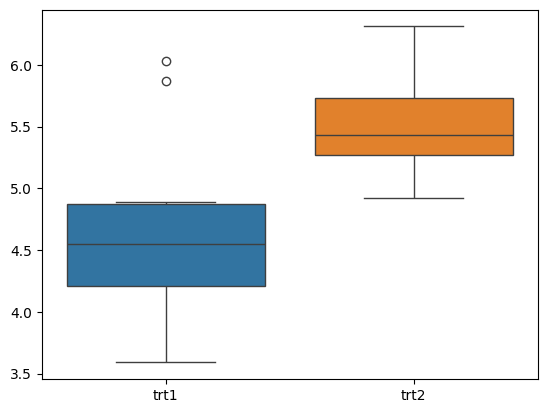

In [43]:
sns.boxplot(data = [t_test_df['trt1'],t_test_df['trt2']])



## References

- https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php
- https://en.wikipedia.org/wiki/Student%27s_t-test
- https://www.quora.com/What-is-the-homogeneity-of-variance-and-why-do-we-check-for-it#:~:text=Homogeneity%20of%20variance%20refers%20to,the%20t%2Dtest%20and%20ANOVA.
